RFM stands for recency, frequency, monetary value.

Recency: How recently has the customer made a transaction with us.

Frequency: How frequent is the customer in ordering/buying some product from us.

Monetary: How much does the customer spend on purchasing products from us.

In [10]:
# importing necessary libraries
import pandas as pd
import datetime as dt
import numpy as np

In [11]:
# importing the data
df = pd.read_csv('Online_Retail.csv', encoding= 'unicode_escape')

In [12]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [13]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/11 12:50,4.95,12680.0,France


In [14]:
df.InvoiceDate = pd.to_datetime(df.InvoiceDate.astype(str))

In [15]:
df.InvoiceDate

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 541909, dtype: datetime64[ns]

In [16]:
df_new = df[df.InvoiceDate.dt.year == 2011]

In [17]:
df_new

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
42481,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom
42482,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom
42483,539993,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom
42484,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom
42485,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [18]:
df_new.loc[:, 'PurchaseSize'] = df_new['Quantity']*df_new['UnitPrice']

C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [19]:
df_new.loc[:, 'PurchaseSize']

42481     19.50
42482     10.50
42483     10.50
42484     10.50
42485     12.50
          ...  
541904    10.20
541905    12.60
541906    16.60
541907    16.60
541908    14.85
Name: PurchaseSize, Length: 499428, dtype: float64

In [20]:
max = df_new['InvoiceDate'].max()

In [21]:
max

Timestamp('2011-12-09 12:50:00')

In [22]:
rfm = df_new.groupby(['CustomerID']).agg({'InvoiceDate': lambda x: (max - x.max()).days,
                                                'InvoiceNo': 'nunique',
                                                'PurchaseSize': sum})

In [23]:
rfm

,InvoiceDate,InvoiceNo,PurchaseSize
CustomerID,,,
12346.0,325,2,0.00
12347.0,1,6,3598.21
12348.0,74,3,904.44
12349.0,18,1,1757.55
12350.0,309,1,334.40
...,...,...,...
18280.0,277,1,180.60
18281.0,180,1,80.82
18282.0,7,3,176.60


In [24]:
#rename columns
rfm = rfm.rename(columns={'InvoiceDate':'Recency', 'InvoiceNo':'Frequency', 'PurchaseSize':'Monetary Value'})

In [25]:
rfm

,Recency,Frequency,Monetary Value
CustomerID,,,
12346.0,325,2,0.00
12347.0,1,6,3598.21
12348.0,74,3,904.44
12349.0,18,1,1757.55
12350.0,309,1,334.40
...,...,...,...
18280.0,277,1,180.60
18281.0,180,1,80.82
18282.0,7,3,176.60


In [26]:
rfm.head()

,Recency,Frequency,Monetary Value
CustomerID,,,
12346.0,325,2,0.00
12347.0,1,6,3598.21
12348.0,74,3,904.44
12349.0,18,1,1757.55
12350.0,309,1,334.40


In [27]:
rfm['R'] = pd.qcut(rfm['Recency'], q=4, labels=list(range(4, 0, -1)))

In [28]:
rfm['R']

CustomerID
12346.0    1
12347.0    4
12348.0    2
12349.0    3
12350.0    1
          ..
18280.0    1
18281.0    1
18282.0    4
18283.0    4
18287.0    3
Name: R, Length: 4244, dtype: category
Categories (4, int64): [4 < 3 < 2 < 1]

In [29]:
rfm['F'] = pd.qcut(rfm['Frequency'].rank(method='first'), q=4, labels=range(1,5))

In [30]:
rfm['F']

CustomerID
12346.0    2
12347.0    4
12348.0    2
12349.0    1
12350.0    1
          ..
18280.0    2
18281.0    2
18282.0    3
18283.0    4
18287.0    3
Name: F, Length: 4244, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

In [31]:
rfm['M'] = pd.qcut(rfm['Monetary Value'], 4, labels=range(1,5))

In [32]:
rfm['M']

CustomerID
12346.0    1
12347.0    4
12348.0    3
12349.0    4
12350.0    2
          ..
18280.0    1
18281.0    1
18282.0    1
18283.0    4
18287.0    4
Name: M, Length: 4244, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

In [33]:
def join_rfm(x):
    'concatinates the R, F, M values into one string'
    return str(x['R']) + str(x['F']) + str(x['M'])

In [34]:
rfm['RFM_Segment'] = rfm.apply(join_rfm, axis=1)

In [35]:
rfm['RFM_Segment']

CustomerID
12346.0    1.02.01.0
12347.0    4.04.04.0
12348.0    2.02.03.0
12349.0    3.01.04.0
12350.0    1.01.02.0
             ...    
18280.0    1.02.01.0
18281.0    1.02.01.0
18282.0    4.03.01.0
18283.0    4.04.04.0
18287.0    3.03.04.0
Name: RFM_Segment, Length: 4244, dtype: object

In [36]:
rfm['RFM_Score'] = rfm[['R', 'F', 'M']].sum(axis=1)

In [37]:
rfm['RFM_Score']

CustomerID
12346.0     4
12347.0    12
12348.0     7
12349.0     8
12350.0     4
           ..
18280.0     4
18281.0     4
18282.0     8
18283.0    12
18287.0    10
Name: RFM_Score, Length: 4244, dtype: int64

In [38]:
def segment_customer(df):
    if df['RFM_Score'] >= 11.0:
        return 'Top Customer'
    if (df['RFM_Score'] >= 9.0) and (df['RFM_Score'] < 11.0):
        return 'High value Customer'
    if (df['RFM_Score'] >= 7.0) and (df['RFM_Score'] < 9.0):
        return 'Medium Value Customer'
    if (df['RFM_Score'] >= 5.0) and (df['RFM_Score'] < 7.0):
        return 'Low Value Customers'
    else:
        return 'Lost Customers'

In [39]:
rfm['Customer_Segment'] = rfm.apply(segment_customer, axis=1)

In [40]:
rfm['Customer_Segment']

CustomerID
12346.0           Lost Customers
12347.0             Top Customer
12348.0    Medium Value Customer
12349.0    Medium Value Customer
12350.0           Lost Customers
                   ...          
18280.0           Lost Customers
18281.0           Lost Customers
18282.0    Medium Value Customer
18283.0             Top Customer
18287.0      High value Customer
Name: Customer_Segment, Length: 4244, dtype: object

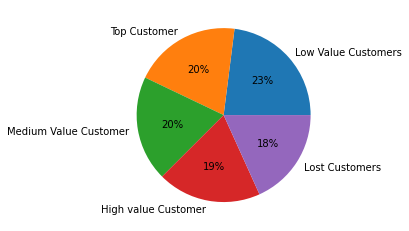

In [41]:
import matplotlib.pyplot as plt

plt.pie(rfm.Customer_Segment.value_counts(),
        labels=rfm.Customer_Segment.value_counts().index,
        autopct='%.0f%%')
plt.show()